# TelegramStats

Today I'm going to analyze my **telegram conversations** with my girlfriend. For collecting your own data you have to go to the chat that you want to analyze, then click on the option panel and finally click on *export chat history*! For obvious reasons I won't insert the JSON file, but you can use yours with the previous explanation. <br /> <br />

This time I won't ask any particular questions, but I'll go trough the analysis as I feel. So, let's begin! Firsty need to look something about the **JSON** file: 

In [ ]:
{
 "name": #chat_name,
 "type": "personal_chat",
 "id": #id,
 "messages": [
  {
   "id": #
   "type": #
   "date": #
   "from": #
   "from_id": #,
   "text": #
  },
     ...
 ]
}

My **telegram id** is "129347830", and my girlfriend is "923502798"

Sencondly, we have to add the **libraries** that we'll use soon

In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from datetime import datetime

Thirdly, we have to create the **dataframe** by the **JSON** file

In [2]:
df = pd.read_json("ChatExport_2020-09-03/result.json")
df.head(1)

,name,type,id,messages
0,Elena,personal_chat,5218470094,"{'id': 193489, 'type': 'service', 'date': '201..."


We need just the "messages" column, so we can do as following

In [3]:
df = df["messages"]
df.head(3)

0    {'id': 193489, 'type': 'service', 'date': '201...
1    {'id': 193491, 'type': 'message', 'date': '201...
2    {'id': 193492, 'type': 'message', 'date': '201...
Name: messages, dtype: object

### Number of messages
The first thing that I'd like to know is who sent more messages between us. Since there are some records without "from_id" but with "action_id" (e.g. voice call) we have to handle the KeyErr with a try catch. When we find this kind of error we can just "continue" and skip this cycle. 

In [4]:
# I'm the first one and she's the second one ("id" : value)
count_message = {"129347830" : 0, "923502798" : 0}

for i in range(0,df.size):
    try: 
        count_message[str(df[i]["from_id"])]+= 1
    except KeyError:
        continue

<BarContainer object of 2 artists>

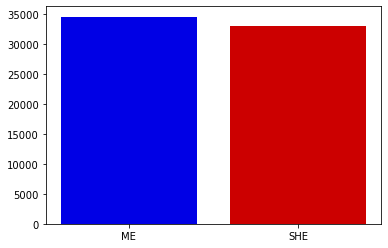

In [5]:
index = ["ME", "SHE"]     
values = [count_message["129347830"],count_message["923502798"]]
plt.bar(index, values,color=["#0000E5","#CC0000"])

It seems that I'm a **stalker**! 

### Most common daytime
Now I'd like to discover when we mostly talk during the the day. For semplicity I'll divide the day in 4 blocks of 6 hours each: <br />
- **morning** : from 6.00am to 11.59am
- **afternoon** : from 12.00pm to 5.59pm
- **eveneng** : from 6.00pm to 11.59am
- **night** : from 12.00am to 5.59am <br />

We can follow the previus method. We need to change just the for construct. Before we start, let's check how to get the date.

In [6]:
df[0]["date"]

'2019-08-13T15:32:33'

So we need to get from the 11th character to the latter

In [7]:
count_message_daytime = {"morning" : 0, "afternoon" : 0, "eveneng" : 0, "night" : 0}

# boundary
morning_l = datetime.strptime('06:00:00', '%H:%M:%S')
morning_m = datetime.strptime('11:59:59', '%H:%M:%S')
afternoon_l = datetime.strptime('12:00:00', '%H:%M:%S')
afternoon_m = datetime.strptime('17:59:59', '%H:%M:%S')
eveneng_l = datetime.strptime('18:00:00', '%H:%M:%S')
eveneng_m = datetime.strptime('23:59:59', '%H:%M:%S')
night_l = datetime.strptime('00:00:00', '%H:%M:%S')
night_m = datetime.strptime('5:59:59', '%H:%M:%S')

for i in range(0,df.size):
    time = df[i]["date"][11:]
    time = datetime.strptime(time, '%H:%M:%S')
    if ( morning_l <= time <= morning_m):
        count_message_daytime["morning"] += 1
    elif ( afternoon_l <= time <= afternoon_m):
        count_message_daytime["afternoon"] += 1
    elif ( eveneng_l <= time <= eveneng_m):
        count_message_daytime["eveneng"] += 1
    elif ( night_l <= time <= night_m):
        count_message_daytime["night"] += 1
    
count_message_daytime

{'morning': 15401, 'afternoon': 23942, 'eveneng': 25626, 'night': 2639}

<BarContainer object of 4 artists>

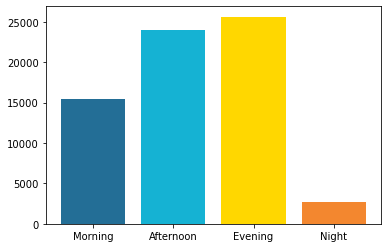

In [8]:
index = ["Morning", "Afternoon", "Evening", "Night"]     
values = [ count_message_daytime["morning"], 
           count_message_daytime["afternoon"], 
           count_message_daytime["eveneng"], 
           count_message_daytime["night"]
         ]
colors=["#236e96", "#15b2d3", "#ffd700", "#f3872f"]
plt.bar(index, values, color=colors)

### Text length and audio duration
Let's discover who is the talkative of the couple! The procedure is similar to the previous ones

In [43]:
me = {"length_message" : 0, "number_message" : 0, "length_audio" : 0, "number_audio" : 0}
she = {"length_message" : 0, "number_message" : 0, "length_audio" : 0, "number_audio" : 0}

#me = "129347830" | she =  "923502798" 

for i in range(0,df.size):
    try: 
        if (df[i]["from_id"] == 129347830):
            me["length_audio"] += df[i]["duration_seconds"]
            me["number_audio"] += 1
        else: 
            she["length_audio"] += df[i]["duration_seconds"]
            she["number_audio"] += 1
    except KeyError:
        # duration_seconds is not present, so it's a message
        try: 
            if (df[i]["from_id"] == 129347830 and len(df[i]["text"]) > 0):
                me["length_message"] += len(df[i]["text"])
                me["number_message"] += 1
            elif (len(df[i]["text"]) > 0): 
                she["length_message"] += len(df[i]["text"])
                she["number_message"] += 1
        except KeyError:
            continue
    

print(me)
print(she)

{'length_message': 628109, 'number_message': 29175, 'length_audio': 45490, 'number_audio': 3079}
{'length_message': 524535, 'number_message': 24985, 'length_audio': 94651, 'number_audio': 6491}


In [60]:
index = ["ME", "SHE"]
value_m = [ me["length_message"]/me["number_message"], she["length_message"]/she["number_message"] ]
value_a = [ me["length_audio"]/me["number_audio"], she["length_audio"]/she["number_audio"] ]
print(value_m)
print(value_a)

[21.529014567266497, 20.993996397838703]
[14.774277362780124, 14.58188260668618]


Text(0.5, 1.0, 'average audio length')

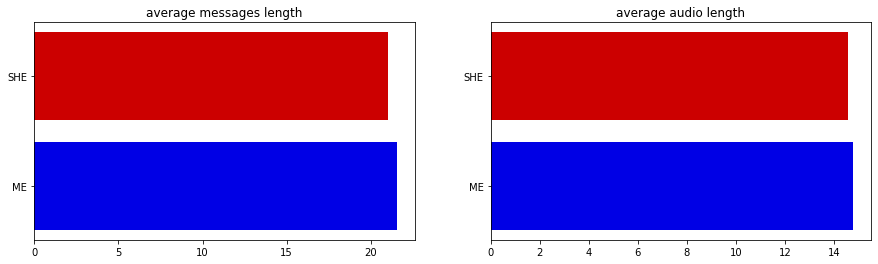

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4))

ax1.barh(index, value_m,color=["#0000E5","#CC0000"])
ax1.set_title("average messages length")
ax2.barh(index, value_a,color=["#0000E5","#CC0000"])
ax2.set_title("average audio length")

I'll finish, I promise!